In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.inspection import permutation_importance



In [111]:
titanic_file_path = "titanic.csv"
titanic_data = pd.read_csv(titanic_file_path)

cleaning of the titanic.csv

In [112]:
titanic_data['Title'] = titanic_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
titanic_data['Title'] = titanic_data['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare',
    'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare',
        'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare'})


In [113]:
titanic_data['Age'] = titanic_data.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))


In [114]:
def deal_nan(columns,with_what):
    return titanic_data.fillna({columns: with_what}, inplace=True)
deal_nan('Cabin','Unknown')




cleaning methods
number 1 dropping duplicates

In [115]:
titanic_data.drop_duplicates(inplace=True)

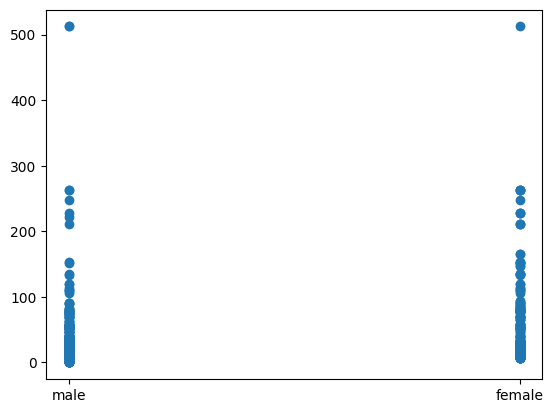

In [116]:
plt.scatter(titanic_data['Sex'], titanic_data['Fare'])

method 2 turning the whole column to uppercase or lower case

In [117]:
titanic_data['Sex'] = titanic_data['Sex'].str.lower()

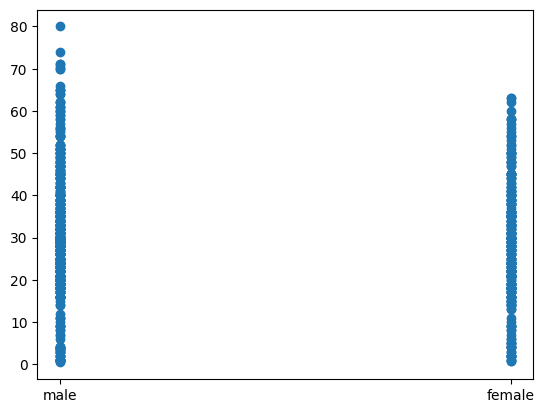

In [118]:
plt.scatter(titanic_data['Sex'], titanic_data['Age'])

checking for outlier in age

In [119]:
invalid_age = titanic_data[(titanic_data['Age']) < 0 | (titanic_data['Age'] > 100)]
print(invalid_age)
invalid_ages = (titanic_data['Age']) < 0 | (titanic_data['Age'] > 100)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title]
Index: []


method 3
dropping or replacing  a range of number
in this case i'm replacing with the median

In [120]:
titanic_data.loc[invalid_ages, 'Age'] = pd.NA
titanic_data['Age'] = titanic_data.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

data exploration of titanic.csv

In [121]:
titanic_data.tail(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,Unknown,S,Mr
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,Unknown,C,Mrs
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,Unknown,C,Miss
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,Unknown,S,Mr
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,Unknown,S,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,30.0,0,0,349217,7.8958,Unknown,S,Mr
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,Unknown,S,Mrs


<Axes: xlabel='Survived'>

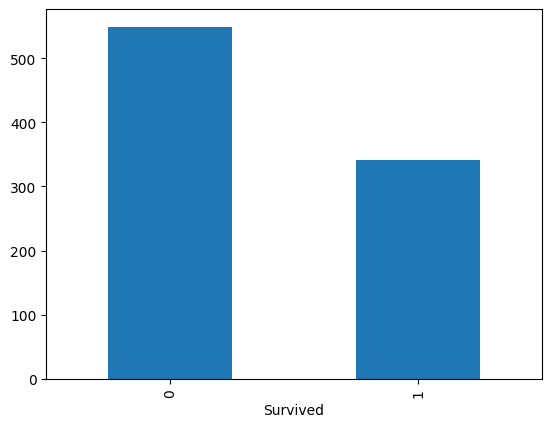

In [122]:
titanic_data['Survived'].value_counts().plot(kind = 'bar')

In [123]:
titanic_data.groupby(['Sex','Survived']).size().unstack(fill_value=0)


Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: ylabel='Survived'>

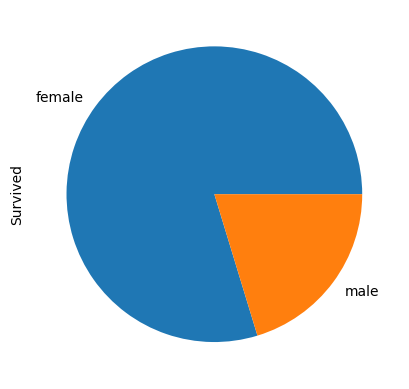

In [124]:
titanic_data.groupby('Sex')['Survived'].mean().plot(kind = 'pie')

In [125]:
titanic_data.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], dtype='object')

In [126]:
#feature selection
not_feature = ["Survived", "PassengerId", "Name", "Cabin", "Ticket"]

In [127]:
#feature extraction
titanic_data['Cabin_letter'] = titanic_data['Cabin'].str[0]

econding of feature

In [128]:
titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Title','Cabin_letter','Sex', 'Embarked', 'Pclass'], drop_first=True)

definition of neccessary feautures

In [129]:

X = titanic_data_encoded.drop(not_feature, axis=1)
y = titanic_data_encoded['Survived']


In [130]:

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

logistic regression model

In [131]:
model_lr = LogisticRegression(max_iter=1000,random_state=0)
model_lr.fit(X_train, y_train)
val_work = model_lr.score(X_val, y_val)
print("val accuracy:", val_work)
train_acclr = model_lr.score(X_train, y_train)
print("val accuracy:", train_acclr)
y_pred_lr = model_lr.predict(X_test)
y_pred_label = pd.Series(y_pred_lr).map({0: "did not survived", 1: "survived"})
print(y_pred_label)

val accuracy: 0.8426966292134831
val accuracy: 0.841091492776886
0              survived
1      did not survived
2      did not survived
3              survived
4              survived
             ...       
174    did not survived
175    did not survived
176    did not survived
177            survived
178            survived
Length: 179, dtype: object


confusion matrix

In [132]:
cmlr = confusion_matrix(y_test,y_pred_lr)
displr = ConfusionMatrixDisplay(confusion_matrix=cmlr)

precision, recall andf1score

In [133]:
precisionrf = precision_score(y_test, y_pred_lr)
recallrf = recall_score(y_test, y_pred_lr)
f1score = f1_score(y_test, y_pred_lr)

In [134]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("accuracy of this model is:", round(accuracy_lr, 2))

accuracy of this model is: 0.81


random forest

In [135]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)
valrf_work = model_rf.score(X_val, y_val)
print("val accuracy:", valrf_work)
train_accrf = model_rf.score(X_train, y_train)
print("val accuracy:", train_accrf)
y_pred_rf = model_rf.predict(X_test)
yrf_pred_label = pd.Series(y_pred_rf).map({0: "did not survived", 1: "survived"})
print(yrf_pred_label)

val accuracy: 0.8426966292134831
val accuracy: 0.985553772070626
0              survived
1      did not survived
2      did not survived
3              survived
4      did not survived
             ...       
174    did not survived
175    did not survived
176    did not survived
177            survived
178            survived
Length: 179, dtype: object


confusion matrix

In [136]:
cmrf = confusion_matrix(y_test,y_pred_rf)
disprf = ConfusionMatrixDisplay(confusion_matrix=cmrf)

precision, recall, accuracy and f1score

In [137]:
precisionrf = precision_score(y_test, y_pred_rf)
recallrf = recall_score(y_test, y_pred_rf)
f1score = f1_score(y_test, y_pred_rf)

ACCURACY

In [138]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("accuracy of this model is:", round(accuracy_rf, 2))

accuracy of this model is: 0.83


In [139]:
model_xg = XGBClassifier(random_state=0)
model_xg.fit(X_train, y_train)
val_workxg = model_xg.score(X_val, y_val)
print("val accuracy:", val_workxg)
train_accxg = model_xg.score(X_train, y_train)
print("Train accuracy:", train_accxg)
y_pred_xg = model_xg.predict(X_test)
yxg_pred_label = pd.Series(y_pred_xg).map({0: "did not survived", 1: "survived"})
print(yxg_pred_label)

val accuracy: 0.8651685393258427
Train accuracy: 0.9759229534510433
0              survived
1      did not survived
2              survived
3              survived
4              survived
             ...       
174    did not survived
175    did not survived
176    did not survived
177            survived
178            survived
Length: 179, dtype: object


confusion matrix

In [140]:
cmxg = confusion_matrix(y_test,y_pred_xg)
dispxg = ConfusionMatrixDisplay(confusion_matrix=cmxg)

precision, recall and accuracy

In [141]:
precisionrf = precision_score(y_test, y_pred_xg)
recallrf = recall_score(y_test, y_pred_xg)
f1score = f1_score(y_test, y_pred_xg)

In [142]:
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print("accuracy of this model is:", round(accuracy_xg, 2))

accuracy of this model is: 0.84


feature performance for logistic regression

In [144]:
# Train model
def importance_feature(model):
    model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    # Permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42)
    # Put into DataFrame
    pi_df = pd.DataFrame({
        "feature": X_test.columns,
        "importance": result.importances_mean
        })
    # Group back by original feature
    pi_df["group"] = pi_df["feature"].str.split("_").str[0]  
     # take part before "_"
    grouped = pi_df.groupby("group")["importance"].sum().sort_values(ascending=False)
    print("Grouped feature importance:")
    return grouped



feature performance for logistic regression

In [145]:
importance_feature(model_lr)

Grouped feature importance:


group
Fare        0.068901
Embarked    0.029795
Title       0.027933
Age         0.018622
Parch       0.014898
Pclass      0.011173
SibSp       0.011173
Cabin       0.009311
Sex         0.009311
Name: importance, dtype: float64

feature performance for xgboost 

In [146]:
importance_feature(model_xg)

Grouped feature importance:


group
Fare        0.068901
Embarked    0.029795
Title       0.027933
Age         0.018622
Parch       0.014898
Pclass      0.011173
SibSp       0.011173
Cabin       0.009311
Sex         0.009311
Name: importance, dtype: float64

features performance for 

In [147]:
importance_feature(model_rf)

Grouped feature importance:


group
Fare        0.068901
Embarked    0.029795
Title       0.027933
Age         0.018622
Parch       0.014898
Pclass      0.011173
SibSp       0.011173
Cabin       0.009311
Sex         0.009311
Name: importance, dtype: float64